

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5931706925632272427
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11281553818
locality {
  bus_id: 1
  links {
  }
}
incarnation: 216815790755324791
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:1e.0, compute capability: 3.7"
]


In [2]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


### 2. Visualize the First 24 Training Images

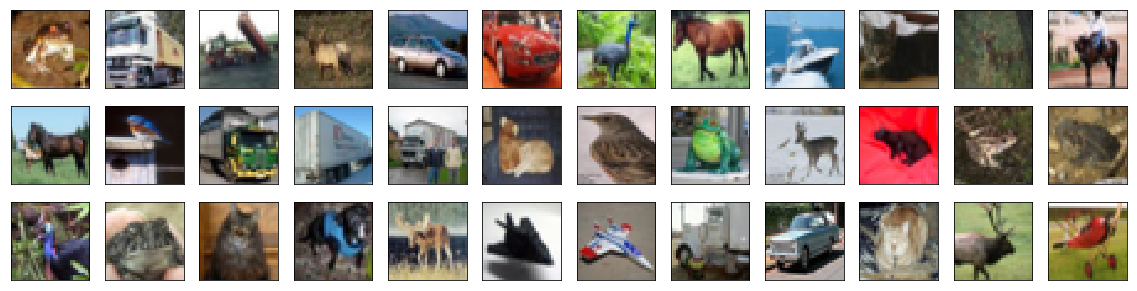

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [4]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [5]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

### 6. Compile the Model 

In [7]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

### 7. Train the Model 

In [8]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 15s - loss: 1.8443 - acc: 0.3188 - val_loss: 1.6802 - val_acc: 0.4116

Epoch 00001: val_loss improved from inf to 1.68021, saving model to model.weights.best.hdf5
Epoch 2/100
 - 14s - loss: 1.5094 - acc: 0.4532 - val_loss: 1.3549 - val_acc: 0.5262

Epoch 00002: val_loss improved from 1.68021 to 1.35492, saving model to model.weights.best.hdf5
Epoch 3/100
 - 14s - loss: 1.3691 - acc: 0.5069 - val_loss: 1.2347 - val_acc: 0.5592

Epoch 00003: val_loss improved from 1.35492 to 1.23473, saving model to model.weights.best.hdf5
Epoch 4/100
 - 14s - loss: 1.2760 - acc: 0.5451 - val_loss: 1.1639 - val_acc: 0.5842

Epoch 00004: val_loss improved from 1.23473 to 1.16393, saving model to model.weights.best.hdf5
Epoch 5/100
 - 14s - loss: 1.1958 - acc: 0.5772 - val_loss: 1.2384 - val_acc: 0.5620

Epoch 00005: val_loss did not improve from 1.16393
Epoch 6/100
 - 14s - loss: 1.1295 - acc: 0.6010 - val_loss: 1.0172 - val_acc: 0.6386

Epoc

 - 14s - loss: 0.6255 - acc: 0.7910 - val_loss: 0.6862 - val_acc: 0.7698

Epoch 00053: val_loss did not improve from 0.63946
Epoch 54/100
 - 14s - loss: 0.6278 - acc: 0.7907 - val_loss: 0.6432 - val_acc: 0.7854

Epoch 00054: val_loss did not improve from 0.63946
Epoch 55/100
 - 14s - loss: 0.6221 - acc: 0.7913 - val_loss: 0.6462 - val_acc: 0.7838

Epoch 00055: val_loss did not improve from 0.63946
Epoch 56/100
 - 14s - loss: 0.6271 - acc: 0.7906 - val_loss: 0.6617 - val_acc: 0.7840

Epoch 00056: val_loss did not improve from 0.63946
Epoch 57/100
 - 14s - loss: 0.6228 - acc: 0.7929 - val_loss: 0.6279 - val_acc: 0.7890

Epoch 00057: val_loss improved from 0.63946 to 0.62793, saving model to model.weights.best.hdf5
Epoch 58/100
 - 14s - loss: 0.6194 - acc: 0.7940 - val_loss: 0.6481 - val_acc: 0.7832

Epoch 00058: val_loss did not improve from 0.62793
Epoch 59/100
 - 14s - loss: 0.6144 - acc: 0.7948 - val_loss: 0.6457 - val_acc: 0.7904

Epoch 00059: val_loss did not improve from 0.62793
Ep

### 8. Load the Model with the Best Validation Accuracy

In [9]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [10]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.785


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [11]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

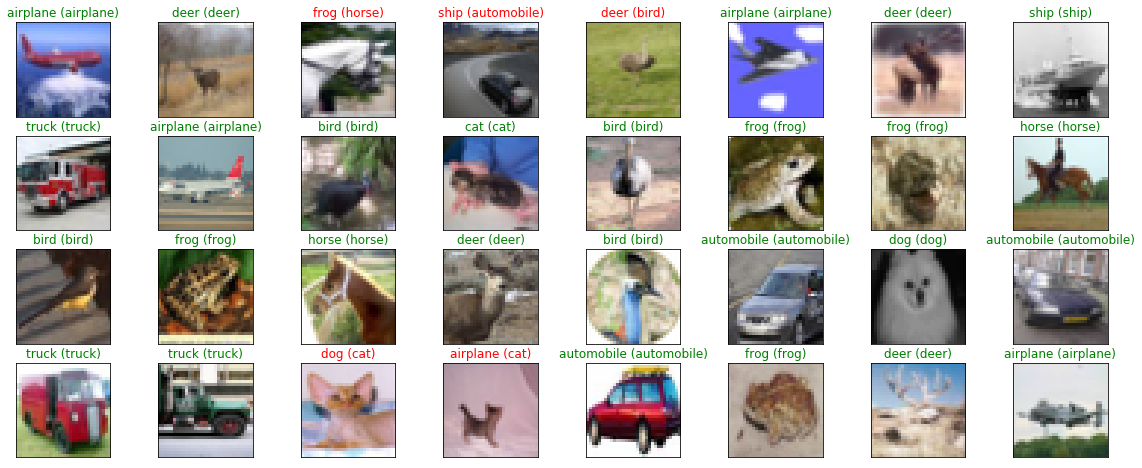

In [12]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))